In [162]:
import os 
import imageio.v3

FILE_PATH = "C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal"

original_img = imageio.v3.imread(os.path.join(FILE_PATH, "NORMAL2-IM-0297-0001.jpeg"))

### Shape of the X-ray images

In [163]:
print(f"Shape of the image: ", original_img.shape)
print(f"Data Type of the image: ", original_img.dtype)

Shape of the image:  (1334, 1890)
Data Type of the image:  uint8


### Displaying the image

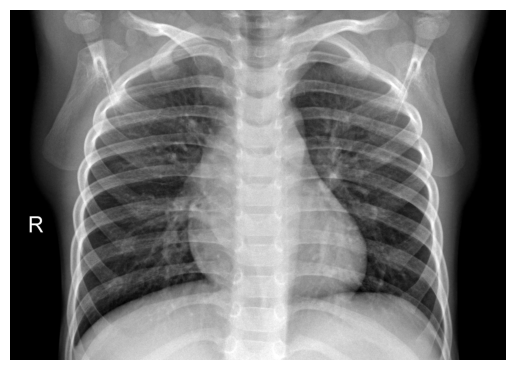

In [164]:
import matplotlib.pyplot as plt

plt.imshow(original_img, cmap="gray")
plt.axis("off")
plt.show()

### List all the Image from the trained normal folder.

In [165]:
import glob

image_dir = "C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal"
# Supported image file extensions
image_extensions = ['*.jpg', '*.jpeg', '*.png']

image_list = []

for ext in image_extensions:
    image_files = glob.glob(os.path.join(image_dir, ext))
    image_list.extend(image_files)

print("LIst of image files in normal")
for image_path in image_list:
    
    print(image_path)


LIst of image files in normal
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_100.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1000.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1001.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1008.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1010.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1014.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1017.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1020.jpeg
C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal\aug_0_1022.jpeg
C:/Users/tulsi/Desktop/Pneumonia-De

### Creating a list of first 10 images

In [166]:
import numpy as np
num_img = 10
arr = []

for i, img in enumerate(image_list):
    if(i == num_img):
        break
    else:
        temp_img = imageio.v3.imread(f"{img}")
        arr.append(temp_img)


Creating GIF from imges

![Alt text](output%20images/x-ray_img.gif)

## Edge detections using various filter methods

IN biomedical data, 2D "edge" is important for particular features detection in an image.

## Laplace filter with Gaussian second derivatives

In [167]:
from scipy import ndimage

xray_LG = ndimage.gaussian_laplace(
    original_img,
    sigma=1
)

In [168]:
def plot_xray(image1, image2, title1="Original", title2="Image2"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

    axes[0].set_title(title1)
    axes[0].imshow(image1, cmap="gray")
    axes[1].set_title(title2)
    axes[1].imshow(image2, cmap="gray")
    for i in axes:
        i.axis("off")
    plt.show()

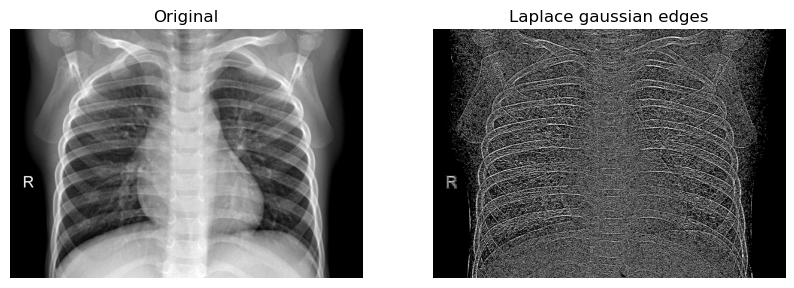

In [169]:
plot_xray(original_img,xray_LG, title2="Laplace gaussian edges")

## Gaussian Gradient magnitude 

In [170]:
xray_GM = ndimage.gaussian_gradient_magnitude(
    original_img,
    sigma=2
)

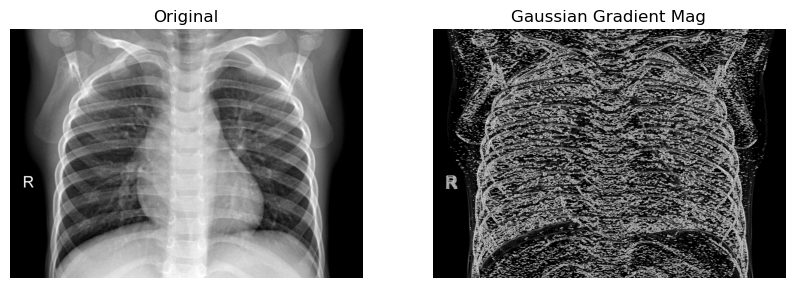

In [171]:
plot_xray(original_img, xray_GM, title2="Gaussian Gradient Mag")

## Sobel - Feldman operator

In [172]:
x_sb = ndimage.sobel(original_img, axis=0)
y_sb = ndimage.sobel(original_img, axis=1)

sobel_img = np.hypot(x_sb, y_sb)
sobel_img *= 255.0 / np.max(sobel_img)




In [173]:
print("The data type before: ", sobel_img.dtype)

sobel_img = sobel_img.astype("float32")

print("The data type after: ", sobel_img.dtype)

The data type before:  float16
The data type after:  float32


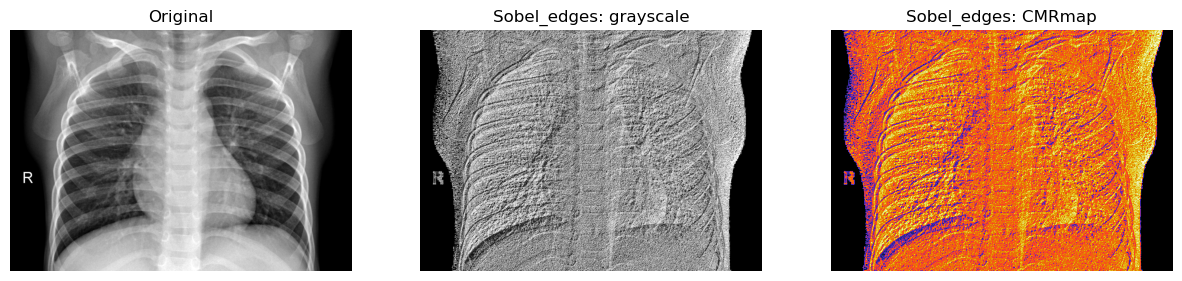

In [174]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Sobel_edges: grayscale")
axes[1].imshow(sobel_img, cmap="gray")
axes[2].set_title("Sobel_edges: CMRmap")
axes[2].imshow(sobel_img, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

## The canny filter

In [175]:
fourier_gau = ndimage.fourier_gaussian(
    original_img,
    sigma=0.05
)

x_prewitt = ndimage.prewitt(fourier_gau, axis=0)
y_prewitt = ndimage.prewitt(fourier_gau, axis=1)

xray_canny = np.hypot(x_prewitt, y_prewitt)
xray_canny *= 255.0 / np.max(xray_canny)

print(f"the data type - {xray_canny.dtype}")



the data type - float64


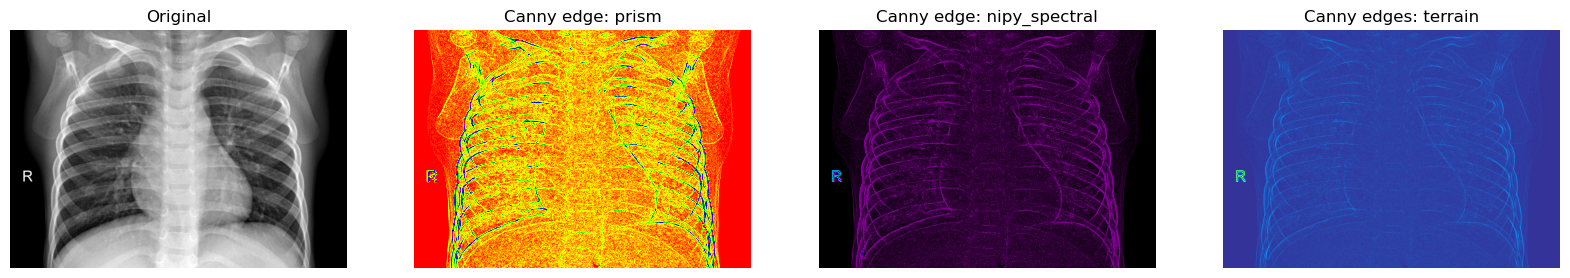

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(original_img, cmap="gray")
axes[1].set_title("Canny edge: prism")
axes[1].imshow(xray_canny, cmap="prism")
axes[2].set_title("Canny edge: nipy_spectral")
axes[2].imshow(xray_canny, cmap="nipy_spectral")
axes[3].set_title("Canny edges: terrain")
axes[3].imshow(xray_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

### How to apply mask to x-ray images for extracting important feature from the raw images?

In [177]:
print("The data type of the X-ray image is: ", original_img.dtype)
print("The minimum pixel value is: ", np.min(original_img))
print("The maximum pixel value is: ", np.max(original_img))
print("The average pixel value is: ", np.mean(original_img))
print("The median pixel value is: ", np.median(original_img))

The data type of the X-ray image is:  uint8
The minimum pixel value is:  0
The maximum pixel value is:  255
The average pixel value is:  112.0240566224824
The median pixel value is:  117.0


Visualize pixel density distribution of X-ray images

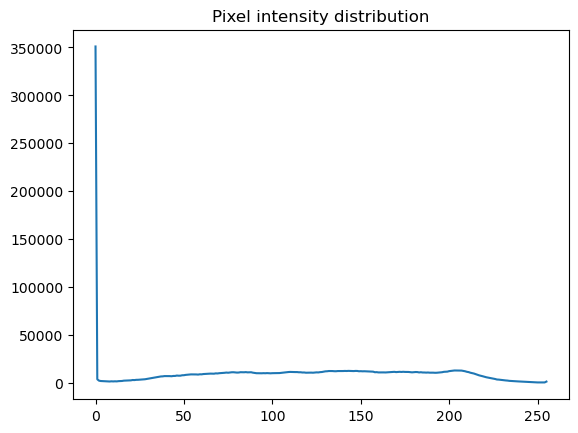

In [178]:
pixel_int_dist = ndimage.histogram(
    original_img,
    min=np.min(original_img),
    max=np.max(original_img),
    bins=256
)

plt.plot(pixel_int_dist)
plt.title("Pixel intensity distribution")
plt.show()

Masking using np.where()

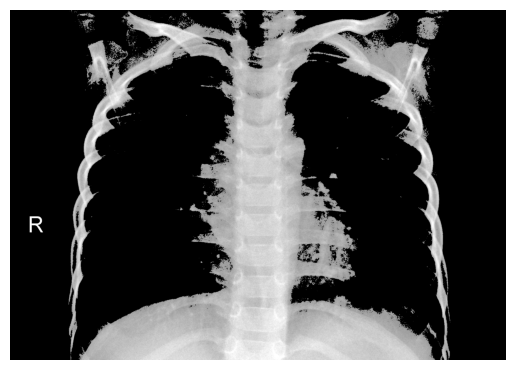

In [179]:
xray_img_mask_noisy = np.where(
    original_img >150,
    original_img, 0
)

plt.imshow(xray_img_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

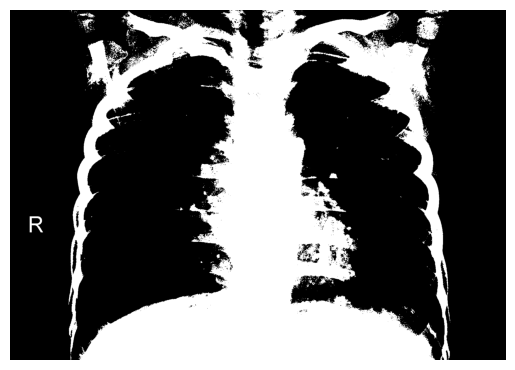

In [180]:
xray_img_mask_noisy = np.where(
    original_img >150,
    1, 0
)

plt.imshow(xray_img_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

Multiple image visualization

In [181]:
# images = [
#     imageio.v3.imread(image_list[i]) for i in range(9)
# ]

import imageio.v3 as iio

# Set the path to your image file
image_path = 'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset/normal/NORMAL2-IM-0297-0001.jpeg'  # Replace this with the actual path to your image

# Read the single image
images = [iio.imread(image_path)]

# Now, 'images' contains just one image


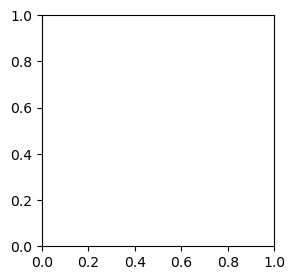

In [182]:
# n_images = len(images)
# n_rows = 3
# n_cols = (n_images + 1) // n_rows

# Set the number of images
n_images = len(images)

# Set the number of rows (you can keep it as 1 since there is only one image)
n_rows = 1

# Set the number of columns (if there's only one image, it will occupy one column)
n_cols = n_images

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

PLotting images

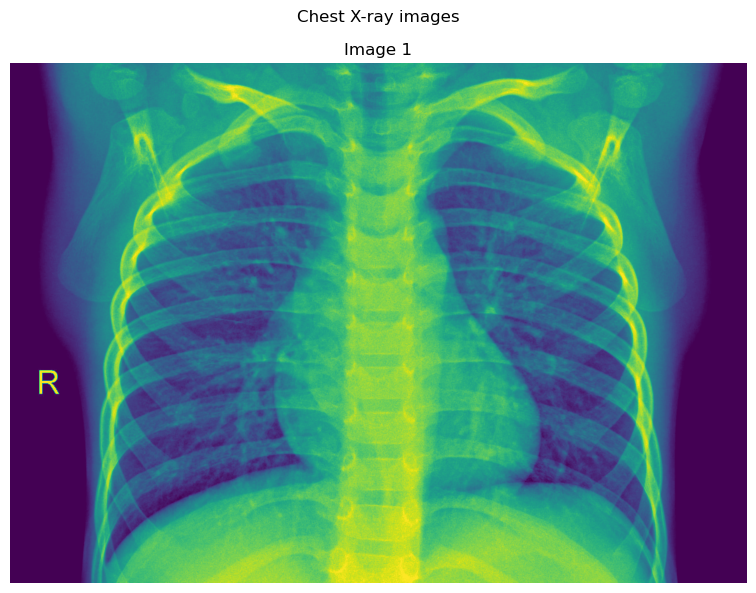

In [183]:
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
# axes = axes.flatten()

# for i in range(n_images):
#     if i < n_images:
#         axes[i].imshow(images[i])
#         axes[i].axis('off')
#         axes[i].set_title(f"Image {i+1}")
#     else:
#         axes[i].axis("off")

# for i in range(n_images, n_rows * n_cols):
#     axes[i].axis("off")

# fig.suptitle("Chest X-ray images")
# plt.tight_layout()
# plt.show()


# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Check if axes is a single Axes object or an array of Axes
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it a list if it's a single Axes object

# Plot the images
for i in range(n_images):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

# Turn off axes for any remaining subplots
for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

# Set the main title and adjust layout
fig.suptitle("Chest X-ray images")
plt.tight_layout()
plt.show()


Image pixel density distribution plot.

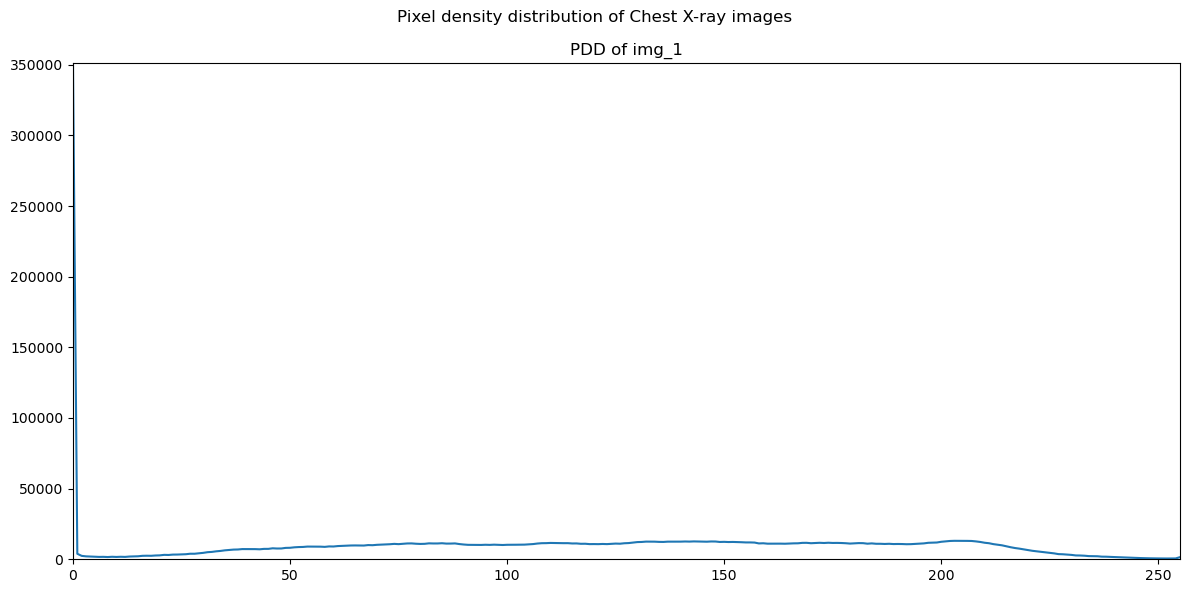

In [184]:
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
# axes = axes.flatten()

# for i in range(n_images):
#     if i < n_images:

#         pixel_int_dist = ndimage.histogram(images[i],
#             min=np.min(images[i]),
#             max=np.max(images[i]),
#             bins=256)
#         axes[i].plot(pixel_int_dist)
#         axes[i].set_xlim(0, 255)
#         axes[i].set_ylim(0, np.max(pixel_int_dist))
#         axes[i].set_title(f"PDD of img_{i+1}")


# fig.suptitle("Pixel density distribution of Chest X-ray images")
# plt.tight_layout()
# plt.show()

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Check if axes is a single Axes object or an array of Axes
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Make it a list if it's a single Axes object

# Loop through images and plot pixel intensity distribution
for i in range(n_images):
    # Calculate pixel intensity distribution
    pixel_int_dist = ndimage.histogram(images[i],
        min=np.min(images[i]),
        max=np.max(images[i]),
        bins=256)
    
    axes[i].plot(pixel_int_dist)
    axes[i].set_xlim(0, 255)
    axes[i].set_ylim(0, np.max(pixel_int_dist))
    axes[i].set_title(f"PDD of img_{i+1}")

# Set the main title and adjust layout
fig.suptitle("Pixel density distribution of Chest X-ray images")
plt.tight_layout()
plt.show()


Extracting Features from images using numpy where() method

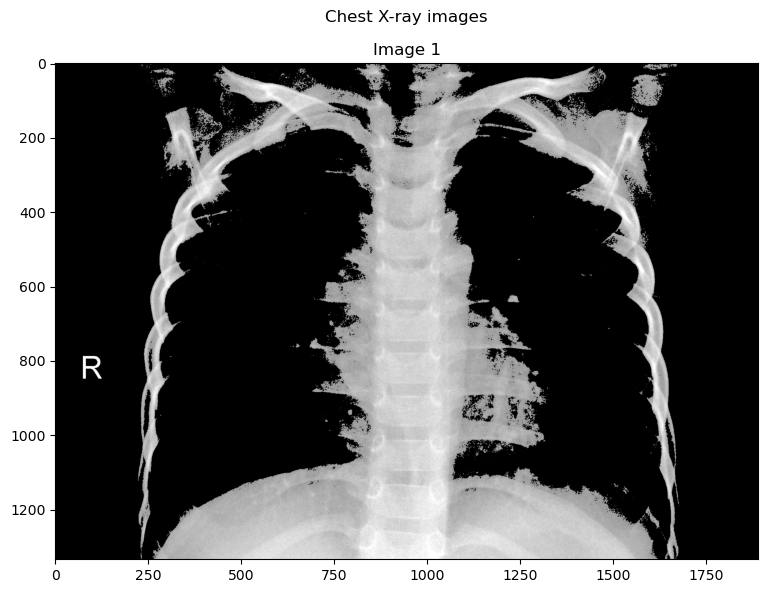

In [185]:
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
# axes = axes.flatten()

# for i in range(n_images):
#     if i < n_images:
#         noisy_image = np.where(images[i] >150, images[i], 0 )
#         axes[i].imshow(noisy_image, cmap="gray")
#         axes[i].set_title(f"Image {i+1}")
#     else:
#         axes[i].axis("off")

# for i in range(n_images, n_rows * n_cols):
#     axes[i].axis("off")

# fig.suptitle("Chest X-ray images")
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# If there's only one subplot, axes won't be an array, so we handle that case
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]  # Turn it into a list if there's only one axis

for i in range(n_images):
    if i < n_images:
        # Apply threshold and create the noisy image
        noisy_image = np.where(images[i] > 150, images[i], 0)
        axes[i].imshow(noisy_image, cmap="gray")
        axes[i].set_title(f"Image {i+1}")
    else:
        axes[i].axis("off")

# Hide unused axes if any
for i in range(n_images, n_rows * n_cols):
    axes[i].axis("off")

fig.suptitle("Chest X-ray images")
plt.tight_layout()
plt.show()


In [186]:
# # Define multiple threshold values
# thresholds = [100, 125, 150, 200]  # Add as many thresholds as you need
# n_thresholds = len(thresholds)

# # Calculate the required number of rows and columns to accommodate all images
# n_rows = len(images)
# n_cols = n_thresholds

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

# # Apply multiple thresholds and visualize
# for i, image in enumerate(images):
#     for j, threshold in enumerate(thresholds):
#         noisy_image = np.where(image < threshold, image, 0)
#         ax = axes[i, j]  # Select the appropriate subplot
#         ax.imshow(noisy_image, cmap="gray")
#         ax.set_title(f"Threshold {threshold}")
#         ax.axis("off")

# # Add a main title and adjust layout
# fig.suptitle("Chest X-ray Images with Multiple Thresholds", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
# plt.show()


# # Define multiple threshold values
# thresholds = [100, 125, 150, 200]  # Add as many thresholds as you need
# n_thresholds = len(thresholds)

# # Calculate the required number of rows and columns to accommodate all images
# n_rows = len(images)
# n_cols = n_thresholds

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

# # If axes is 2D, flatten it for easier indexing
# axes = axes.flatten()

# # Apply multiple thresholds and visualize
# for i, image in enumerate(images):
#     for j, threshold in enumerate(thresholds):
#         noisy_image = np.where(image < threshold, image, 0)
#         ax = axes[i * n_thresholds + j]  # Select the appropriate subplot
#         ax.imshow(noisy_image, cmap="gray")
#         ax.set_title(f"Threshold {threshold}")
#         ax.axis("off")

# # Add a main title and adjust layout
# fig.suptitle("Chest X-ray Images with Multiple Thresholds", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
# plt.show()


import os
import numpy as np
import matplotlib.pyplot as plt

# Define multiple threshold values
thresholds = [90, 95, 100, 125, 150, 200]  # Add as many thresholds as you need
n_thresholds = len(thresholds)

# Create a directory to save images if it doesn't exist
output_dir = "thresholded_images"
os.makedirs(output_dir, exist_ok=True)

# Apply multiple thresholds and save images
for i, image in enumerate(images):
    for threshold in thresholds:
        noisy_image = np.where(image < threshold, image, 0)

        # Define filename
        filename = f"{output_dir}/image_{i}_threshold_{threshold}.png"

        # Save the image without plots
        plt.imsave(filename, noisy_image, cmap="gray")

print(f"All thresholded images are saved in '{output_dir}' directory.")




All thresholded images are saved in 'thresholded_images' directory.
